# 3. Базовые статистические модели

In [2]:
# Import the libraries
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts
from KDEpy import FFTKDE
%matplotlib inline

## 1. [# 30] На станции лондонского метро подсчитывалось количество женщин в каждой из 100 очередей длиной 10. Таким образом, был получен набор данных x1, x2, ... , x100, где xi обозначает наблюдаемое количество женщин в i-й очереди. Набор данных представлен в таблице
## Женщин                   0 1 2  3  4  5  6 7 8 9 10
## Количество очередей      1 3 4 23 25 19 18 5 1 1  0
## В статистической модели для этого набора данных мы предполагаем, что наблюдаемые значения являются реализацией случайной выборки X1, X2, ... , X100.

(array([0.01111111, 0.03333333, 0.04444444, 0.25555556, 0.27777778,
        0.21111111, 0.2       , 0.05555556, 0.01111111, 0.01111111]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

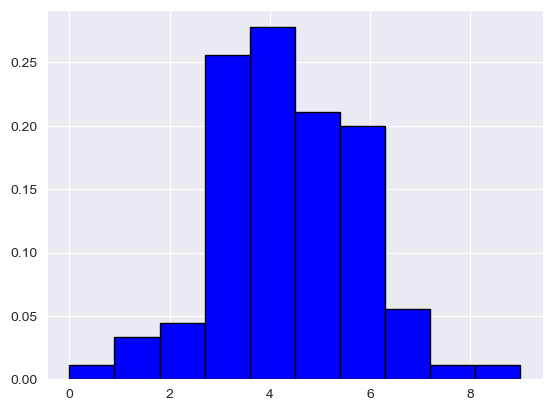

In [7]:
df_women = pd.read_excel('women.xlsx')['count'];
plt.hist(df_women, color='blue', edgecolor='black', density=True)

(0.0, 10.0)

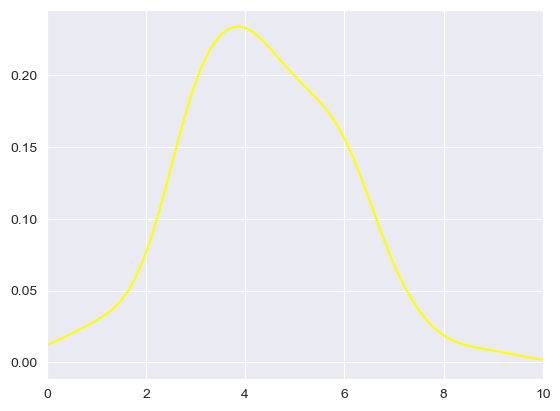

In [8]:
bw = 1.06*df_women.std()*(df_women.size**(-1/5))

x_corrected, y_corrected = FFTKDE(bw = bw, kernel='gaussian').fit(df_women.values)(df_women.size) 
plt.plot(x_corrected, y_corrected, color = 'yellow')

plt.xlim(0, 10)

По представленным графикам можно сделать заключение о том,что для данной модели подходит нормальное распределение.

In [9]:
print('Параметры: ', str(sts.norm.fit(df_women)))

Параметры:  (4.35, 1.5708278072405009)


## 2. [# 30] Во время Второй мировой войны на Лондон обрушилось множество летающих бомб. Следующие данные относятся к площади в Южном Лондоне площадью 36 квадратных километров. Площадь была разделена на 576 квадратов со сторонами длиной 1/4 километра. Для каждого из 576 квадратов было записано количество ударов. Таким образом, мы получаем набор данных x1, x2, ... , x576, где xi обозначает количество ударов в i-м квадрате. Данные обобщены в следующей таблице, в которой указано количество квадратов без ударов, с одним попаданием, с двумя попаданиями и т.д.
## Попаданий 0 1 2 3 4 5 6 7
## Количество квадратов 229 211 93 35 7 0 0 1
## Вопрос заключается в том, велось ли бомбометание Лондона случайным образом? В этом случае данные должны иметь распределение Пуассона.


(array([0.56795635, 0.52331349, 0.23065476, 0.        , 0.08680556,
        0.01736111, 0.        , 0.        , 0.        , 0.00248016]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

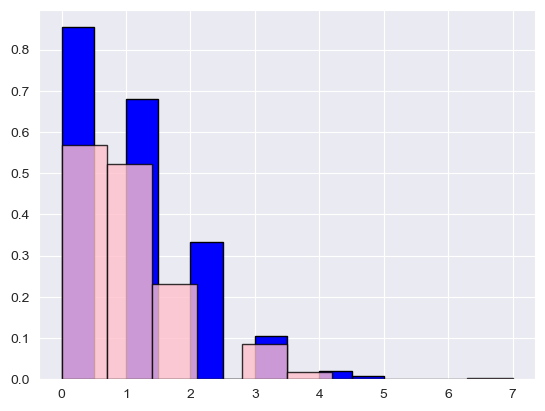

In [10]:
df_bombs = pd.read_excel('bombs.xlsx')['bombs']

mean = df_bombs.mean()
poisson_rv = sts.poisson(mean)
sample = poisson_rv.rvs(df_bombs.size)
plt.hist(sample, color = 'blue', edgecolor = 'black', density=True)
plt.hist(df_bombs, color = 'pink', alpha = 0.8, edgecolor = 'black', density=True)

Сравнивая истинные значения и значения выборки, легко увидеть, что истинное распределение - распределение Пуассона

Text(0.5, 0, '$x$')

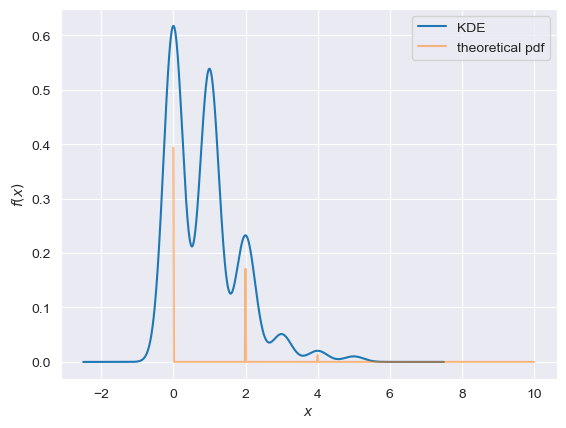

In [5]:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

x = np.linspace(0, 10, df.size)
pmf = poisson_rv.pmf(x)
plt.plot(x, pmf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## 3. [# 30] Исследовалось количество менструальных циклов до наступления беременности, где количество циклов моделировалось геометрической случайной величиной. Исходные данные касались 100 курящих и 486 некурящих женщин. Для 7 курильщиц и 12 некурящих точное количество циклов до наступления беременности было неизвестно.

Для оценки параметра p можно взять количество женщин, у которых беременность наступила после первого цикла, и разделить на количество женщин

0.3118279569892473


(array([0.31063321, 0.14934289, 0.04778973, 0.02389486, 0.        ,
        0.01194743, 0.00597372, 0.        , 0.        , 0.00597372]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

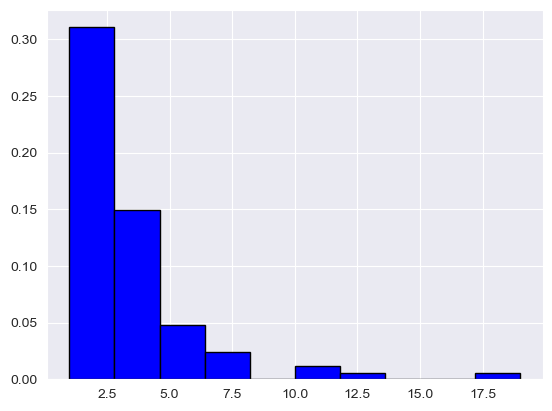

In [13]:
df_cycle = pd.read_excel('cycle.xlsx').smoking

p_smoking = len(df_cycle[df_cycle == 1]) / df_cycle.size
print(p_smoking)
geom_rv = sts.geom(p_smoking)
sample = geom_rv.rvs(df_cycle.size)
plt.hist(sample, color = 'blue', edgecolor = 'black', density=True)

Для некурящих женщит можно сделать также

0.4177215189873418


(array([0.47920434, 0.09795057, 0.08589512, 0.01808318, 0.00904159,
        0.01959011, 0.00301386, 0.        , 0.        , 0.00150693]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

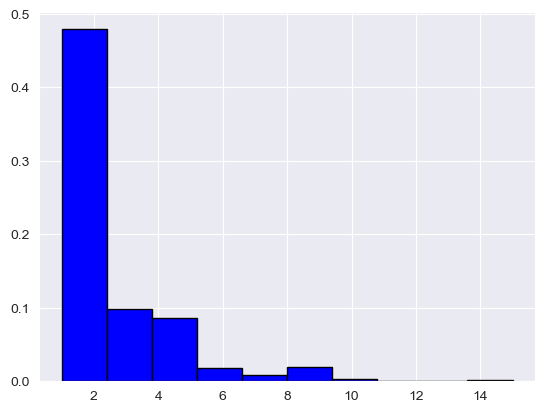

In [15]:
df_cycle_not_smoking = pd.read_excel('cycle_not_smoking.xlsx')['not smoking']

p_not_smoking = len(df_cycle_not_smoking[df_cycle_not_smoking == 1]) / df_cycle_not_smoking.size
print(p_not_smoking)
geom_rv_not_smoking = sts.geom(p_not_smoking)
sample_not_smoking = geom_rv_not_smoking.rvs(df_cycle_not_smoking.size)
plt.hist(sample_not_smoking, color='blue', edgecolor='black', density=True)

In [16]:
smoking_p_for_3_cycle = p_smoking + (1 - p_smoking) * p_smoking + (1 - p_smoking) ** 2 * p_smoking
print(smoking_p_for_3_cycle)

not_smoking_p_for_3_cycle = p_not_smoking + (1 - p_not_smoking) * p_not_smoking + (1 - p_not_smoking) ** 2 * p_not_smoking
print(not_smoking_p_for_3_cycle)

0.6740949603223445
0.8025795119655849


Выше представлена оценка вероятности забеременеть за три или менее циклов для курящих и
некурящих женщин.Из данных видно, что у некурящих вероятность забеременеть за 3 или менее циклов выше